In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tata-stocks/data.csv
/kaggle/input/lstm-model/lstm_model(1).h5
/kaggle/input/tata-stock/data1.csv
/kaggle/input/stock-prediction/RawData.xlsx


In [28]:
import pandas as pd
md = pd.read_excel("/kaggle/input//stock-prediction/RawData.xlsx")

In [49]:
from sklearn.preprocessing import MinMaxScaler
def preprocess(closing_stocks):
    stocks_1 = closing_stocks[: , 0]
    stocks_1 = stocks_1.reshape(len(closing_stocks) , 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stocks_1 = scaler.fit_transform(stocks_1)
    x, y = arrange(stocks_1)
    x = x.reshape(x.shape[0] , 1 ,x.shape[1])
    return x,y

In [30]:

days = 2

def arrange(data):
    X = []
    Y = []
    for i in range(len(data) - days):
        X.append(data[i:i+days,0])
        Y.append(data[i+days,0])
    return np.array(X),np.array(Y)

In [31]:
X,Y = preprocess(data)

In [32]:
print(X.shape,Y.shape)
from math import sqrt

(255, 1, 2) (255,)


In [33]:
from statistics import mean
def prediction(x,y):
    from matplotlib import pyplot as plt
    y_pred = model.predict(x)
    plt.rcParams["figure.figsize"] = (15,7)
    plt.figure()
    plt.plot(y_pred)
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    error = sqrt(mean_squared_error(y, y_pred))
    print(error)
    plt.plot(y)
    plt.title('Prediction vs Real Stock Price')
    plt.ylabel('Price')
    plt.xlabel('Days')
    plt.legend(['Prediction', 'Real'], loc='upper left')
    plt.show()

In [34]:
from keras.models import load_model
model = load_model("/kaggle/input/lstm-model/lstm_model(1).h5")

In [35]:
def result(df):
    data = np.array(df)
    days = 2
    X,Y = preprocess(data)
   
    prediction(X,Y)

0.01262879668991616


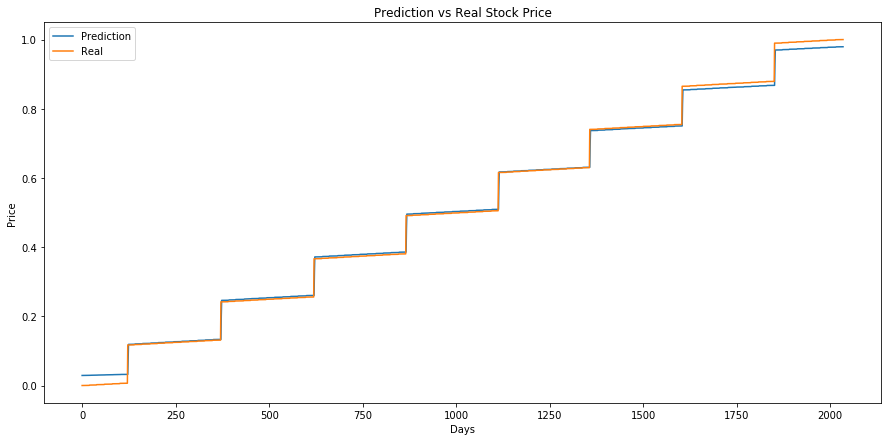

In [36]:
result(md)

In [37]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [50]:
import yfinance as yf

msft = yf.Ticker("FB")
print(msft)

yfinance.Ticker object <FB>


0.05076262505666915


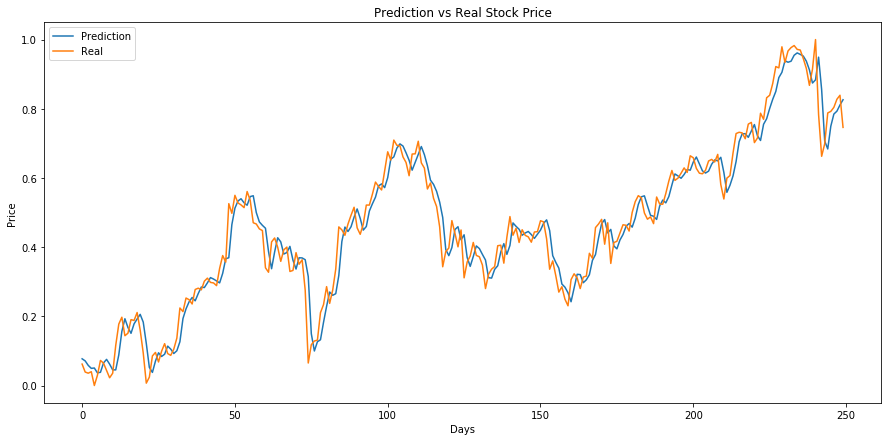

In [51]:
stock = msft.history(period="1y")['Close']
result(np.array(stock).reshape(-1,1))

In [63]:

def pred(msft):
    stock = msft.history(period="max")[-3:-1]['Close']
    stocks = np.array(stock).reshape(1,2)
    stocks = np.array(stocks)
    stocks_mean = (stocks[0,0] + stocks[0,1])/2
    stocks = (stocks-stocks_mean)/2
    x = stocks.reshape(stocks.shape[0] , 1 ,stocks.shape[1])
    y_pred = model.predict(x) + stocks_mean
    print(y_pred)
    difference = y_pred - stock[-1:].values
    s = msft.history(period="max")[-1:]['Close']
    reality = s.values-stock[-1:].values

    print("prediction : ")
    if difference>0:
        print( "increase")
    else:
        print( "decrease")
    print("in reality : ")
    if reality>0:
        print( "increase")
    else:
        print( "decrease")
pred(msft)

[[212.74892]]
[[-0.31108337]]
prediction : 
decrease
in reality : 
decrease
